In this example we are going to fetch GHI and Clearsky GHI for 5 days in the past for the Sydney Opera House.

In [1]:
from solcast import historic

To test the API you can use [unmetered locations](https://docs.solcast.com.au/?_gl=1*k80zyt*_ga*MzQ4NzM2ODEuMTY5MDI2MzUwOQ..*_ga_BYH3TC3R79*MTY5MjIzOTc0NS4xOC4xLjE2OTIyMzk3NzQuMC4wLjA.&_ga=2.240435015.595123581.1692145391-34873681.1690263509#unmetered-locations), in the sdk:

In [2]:
from solcast.unmetered_locations import UNMETERED_LOCATIONS
sydney = UNMETERED_LOCATIONS['Sydney Opera House']

We are going to use the `historic.radiation_and_weather` API:

In [3]:
res = historic.radiation_and_weather(
    latitude=sydney['latitude'], 
    longitude=sydney['longitude'],
    output_parameters='clearsky_ghi,ghi',
    start='2022-06-01T14:45:00.000Z',
    duration='P5D'
)

Let's transform the result in a DataFrame with the `res.to_pandas()` and plot the time series with `matplotlib`.
Since we are retrieving data for Sydney, we can cast the times to the local timezone too:

<Axes: xlabel='period_end'>

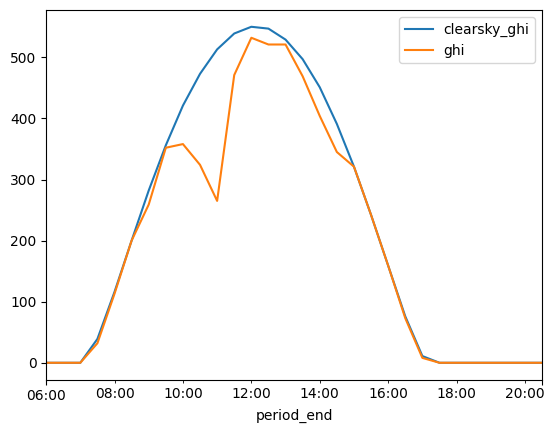

In [4]:
df = res.to_pandas()
df.index = df.index.tz_convert('Australia/Sydney')
df[10:40].plot()